The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vaccinated_smoothed
new_people_vaccinated_smoothed_per_hundred
stringency_index
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cardiovasc_death_rate
diabetes_prevalence
female_smokers
male_smokers
handwashing_facilities
hospital_beds_per_thousand
life_expectancy
human_development_index
population
excess_mortality_cumulative_absolute
excess_mortality_cumulative
excess_mortality
excess_mortality_cumulative_per_million


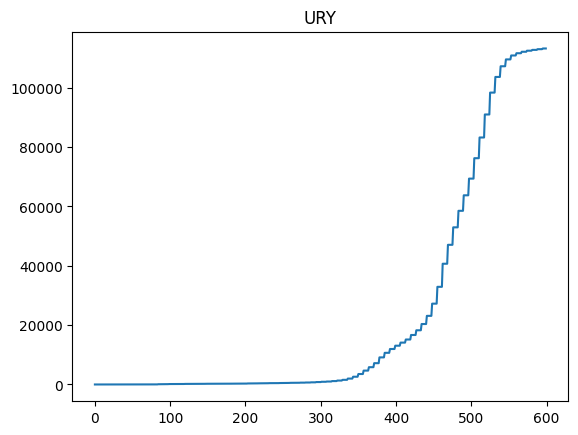

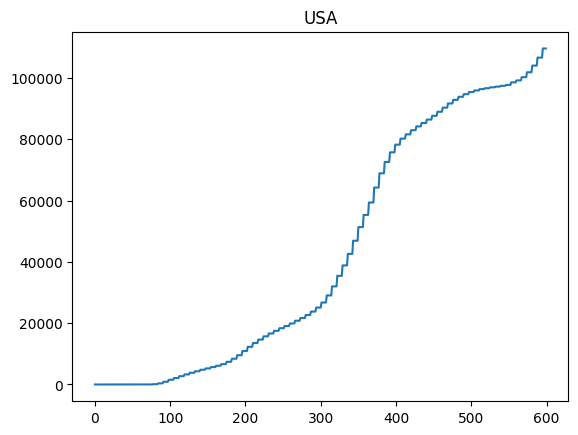

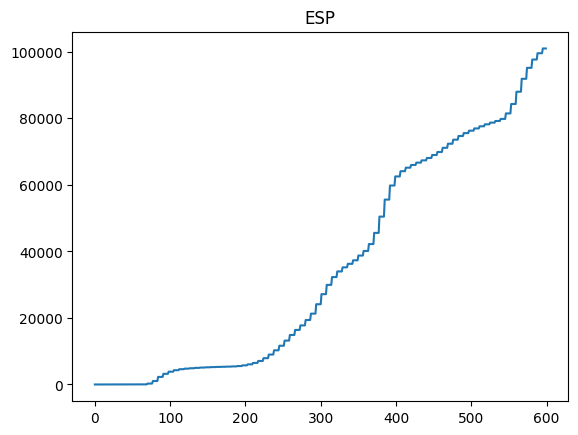

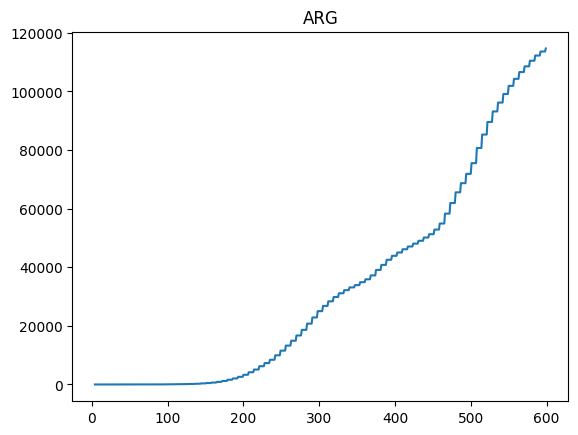

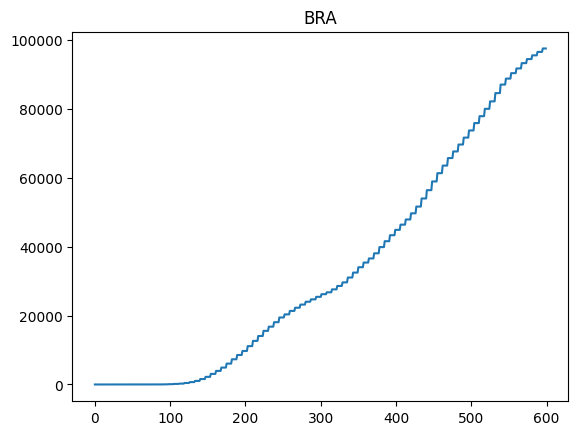

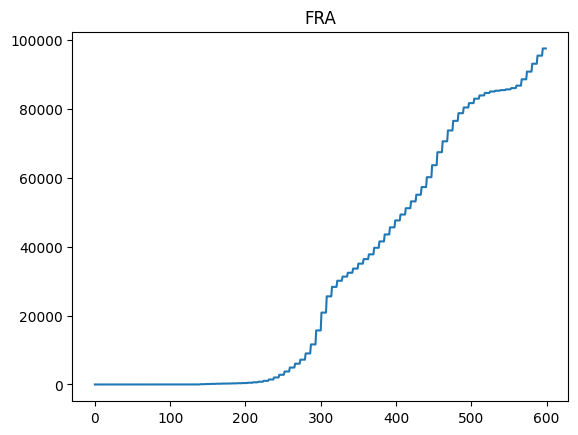

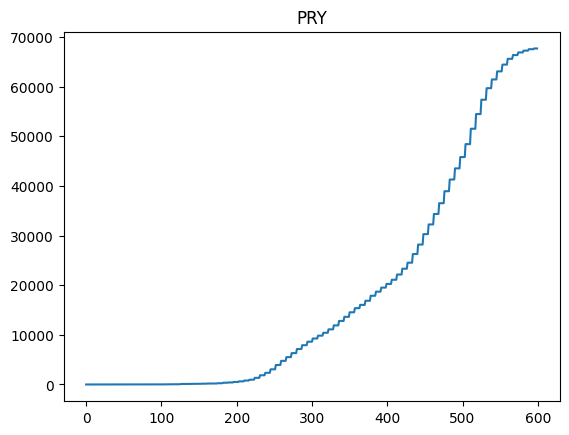

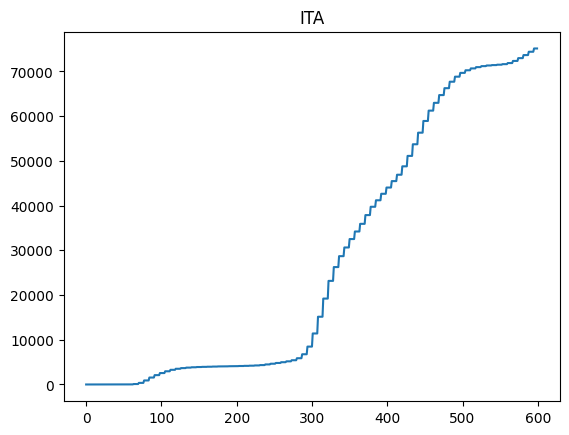

In [6]:
%load_ext autoreload

%autoreload
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from crosslearning.lib.utils import get_covid_datasets
# print(os.getcwd())
df = pd.read_csv('crosslearning/data/owid-covid-data.csv')

for idx, key in enumerate(df):
    if idx>40:
        print(key)

# for key in df['iso_code']:
#     print(key)

# print(len(df["iso_code"].drop_duplicates()))
# print( df["iso_code"].drop_duplicates())

# print( sum(df["iso_code"] == 'USA'))
countries = [ 'URY','USA', 'ESP', 'ARG','BRA','FRA','PRY', 'ITA']
#countries = [ 'URY']

key = 'total_cases_per_million'
datasets = {}
for ele in countries:
    plt.figure()
    datasets[ele] = df[df["iso_code"] == ele]
    x = np.arange(len(datasets[ele][key]))
    plt.plot(x[0:600],datasets[ele][key][0:600])
    plt.title(ele)
# plt.legend(countries)

# ls = get_covid_datasets(countries, 0, 400, 600, key )

In [2]:
import pickle
from crosslearning.lib.models import *
from crosslearning.lib.configs import datasets, countries, estimator_vals, logg_every_e
import os
import matplotlib.pyplot as plt

# def addOverCountries(listOfCountries, errorDict):
#     errorDict []
#     return errorTrain, errorTest

file_path = os.getcwd()+"/crosslearning/output/2023-11-0618:08:52_data.pkl"

with open(file_path, "rb") as pickle_file:
    loaded_data = pickle.load(pickle_file)

trainAcc = 0
testAcc = 0

for country in countries:
    print(f"Country {country}")
    print(f"For Centralized train error {loaded_data['centralized'][country]['train']} and test error {loaded_data['centralized'][country]['test']}" )
    print(f"For Independent train error {loaded_data['independent'][country]['train']} and test error {loaded_data['independent'][country]['test']}" )
    print('Parametric')
    for epsilon in loaded_data['epsilonsParametric']:
        print(f"For Parametric {epsilon} train error {loaded_data['CLParametric'][str(epsilon)][country]['train']} and test error {loaded_data['CLParametric'][str(epsilon)][country]['test']}" )
    for epsilon in loaded_data['epsilonsFunctional']:
        print(f"For Functional {epsilon} train error {loaded_data['CLFunctional'][str(epsilon)][country]['train']} and test error {loaded_data['CLFunctional'][str(epsilon)][country]['test']}" )

print(f"For Functional {epsilon} train error {loaded_data['CLFunctional'][str(epsilon)][country]['lambdas']} and test error {loaded_data['CLFunctional'][str(epsilon)][country]['constraint']}" )


ModuleNotFoundError: No module named 'lib'